<a href="https://colab.research.google.com/github/janhavi-giri/Kaggle_Projects_Part_2/blob/main/ML_for_Data_Science_Kaggle_data_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The data set for this project is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

## The goal is to develop Machine Learning Models to present a complete analysis for online shopping behavior data set.

## Description of data set:
### The data set is "online_shoppers_intention.csv". This data set represents skewed data, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
```
a. The dataset consists of 10 numerical and 8 categorical attributes.
b. The 'Revenue' attribute can be used as the class label.
c. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
d. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
e. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
f. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
g. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page and it represents the percentage that the page was seen in the last session. 
h. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
i. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
j. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
```

## Task 1: To build a predictive classification model (ensuring optimal features and classifier). Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March. 

## Task 2: To generate user-bahavior clusters based on the purchasing behavior data for the complete dataset. 



## Task 1: To build a predictive classification model (ensuring optimal features and classifier). Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ML_midterm')
pwd = os.getcwd()
print(pwd)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/ML_midterm


In [ ]:
# Importing the necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Step1: Explore and cleaning the data set
# Read the data from csv file
df = pd.read_csv('online_shoppers_intention.csv')
print("# of features in dataset are =", df.shape[1])
print("# of samples in dataset are =", df.shape[0])
#List name of features
print("Features of data set are =", df.columns)
#List datatypes of features
print("Feature datatypes are=",df.dtypes)

# of features in dataset are = 18
# of samples in dataset are = 12330
Features of data set are = Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Feature datatypes are= Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Visito

In [ ]:
#Print first few rows of the input dataset
df.head()

Administrative  Administrative_Duration  ...  Weekend  Revenue
0               0                      0.0  ...    False    False
1               0                      0.0  ...    False    False
2               0                      0.0  ...    False    False
3               0                      0.0  ...    False    False
4               0                      0.0  ...     True    False

[5 rows x 18 columns]

In [ ]:
# Investigate the data set for any null values
for col in df.columns.to_list():
    print("Column", col, "Null value count=", df[col].isnull().sum())
    if(df[col].isnull().sum()!=0):
        print("Column has null count=",col, df[col].isnull().sum(), "and their datatype is",df[col].dtypes )
        

Column Administrative Null value count= 0
Column Administrative_Duration Null value count= 0
Column Informational Null value count= 0
Column Informational_Duration Null value count= 0
Column ProductRelated Null value count= 0
Column ProductRelated_Duration Null value count= 0
Column BounceRates Null value count= 0
Column ExitRates Null value count= 0
Column PageValues Null value count= 0
Column SpecialDay Null value count= 0
Column Month Null value count= 0
Column OperatingSystems Null value count= 0
Column Browser Null value count= 0
Column Region Null value count= 0
Column TrafficType Null value count= 0
Column VisitorType Null value count= 0
Column Weekend Null value count= 0
Column Revenue Null value count= 0


In [ ]:
# Verified above that the given data set doesn't contain any Null values
#Determine non-numeric and boolean features
non_numeric_columns = list(df.select_dtypes(include='object'))
print("Non-numeric columns are=",non_numeric_columns)        
bool_columns = list(df.select_dtypes(include='bool'))
print("Boolean columns are=", bool_columns)    
for col in non_numeric_columns:
   print("Non-numeric columns are=\n",  df[col].value_counts())
for col in bool_columns:
   print("Boolean columns are=\n",  df[col].value_counts())

Non-numeric columns are= ['Month', 'VisitorType']
Boolean columns are= ['Weekend', 'Revenue']
Non-numeric columns are=
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Non-numeric columns are=
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Boolean columns are=
 False    9462
True     2868
Name: Weekend, dtype: int64
Boolean columns are=
 False    10422
True      1908
Name: Revenue, dtype: int64


In [ ]:
#Create training dataset for Months June-Dec
#Determine how months are specified 
print(df['Month'].value_counts())


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


In [ ]:
df.loc[df['Month']=='June']

Administrative  Administrative_Duration  ...  Weekend  Revenue
5456               3                40.200000  ...    False    False
5458               6               618.066667  ...    False     True
5459               0                 0.000000  ...    False    False
5470               2                13.000000  ...    False    False
5471               0                 0.000000  ...    False    False
...              ...                      ...  ...      ...      ...
7934               0                 0.000000  ...    False    False
7943               0                 0.000000  ...     True    False
7960               2               124.400000  ...    False    False
7965               3                95.833333  ...     True    False
7972               0                 0.000000  ...    False     True

[288 rows x 18 columns]

In [ ]:
# Determine the non-numeric features and convert them to numeric
# For 'Month'
train_month_col = ['June', 'Jul','Aug','Sep', 'Oct', 'Nov','Dec']
test_month_col = ['Feb','Mar']
train_df = df[df['Month'].isin(train_month_col)]
test_df = df[df['Month'].isin(test_month_col)]
print("Train data set shape after labeling=", train_df.shape)
print("Test data set shape after labeling=", test_df.shape)
print()
print("Before labeling train data set months/counts=\n",train_df.Month.value_counts())
print()
print("Before labeling test data set months/counts=\n",test_df.Month.value_counts())
print()
train_month_num = [6,7,8,9,10,11,12]
test_month_num =[2,3]
train_df['Month'] = train_df['Month'].replace(train_month_col, train_month_num)
test_df['Month'] = test_df['Month'].replace(test_month_col, test_month_num)
print("Train data set shape after labeling=\n", train_df.shape)
print("Test data set shape after labeling=", test_df.shape)
print()
print("Before labeling train data set months/counts=\n",train_df.Month.value_counts())
print()
print("Before labeling test data set months/counts=\n",test_df.Month.value_counts())



Train data set shape after labeling= (6875, 18)
Test data set shape after labeling= (2091, 18)

Before labeling train data set months/counts=
 Nov     2998
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Name: Month, dtype: int64

Before labeling test data set months/counts=
 Mar    1907
Feb     184
Name: Month, dtype: int64

Train data set shape after labeling=
 (6875, 18)
Test data set shape after labeling= (2091, 18)

Before labeling train data set months/counts=
 11    2998
12    1727
10     549
9      448
8      433
7      432
6      288
Name: Month, dtype: int64

Before labeling test data set months/counts=
 3    1907
2     184
Name: Month, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# For 'Visitor_type'
visitor_type = ['Returning_Visitor', 'New_Visitor', 'Other']
print("Before labeling train data set VisitorType/counts=\n",train_df.VisitorType.value_counts())
print()
print("Before labeling test data set VisitorType/counts=\n",test_df.VisitorType.value_counts())
print()
train_df['VisitorType'] = train_df['VisitorType'].replace(visitor_type, [0,1,2])
test_df['VisitorType'] = test_df['VisitorType'].replace(visitor_type, [0,1,2])
print("After labeling train data set VisitorType/counts=\n",train_df.VisitorType.value_counts())
print()
print("After labeling test data set VisitorType/counts=\n",test_df.VisitorType.value_counts())
print()

Before labeling train data set VisitorType/counts=
 Returning_Visitor    5648
New_Visitor          1142
Other                  85
Name: VisitorType, dtype: int64

Before labeling test data set VisitorType/counts=
 Returning_Visitor    1858
New_Visitor           233
Name: VisitorType, dtype: int64

After labeling train data set VisitorType/counts=
 0    5648
1    1142
2      85
Name: VisitorType, dtype: int64

After labeling test data set VisitorType/counts=
 0    1858
1     233
Name: VisitorType, dtype: int64



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# For 'Weekend' and 'Revenue'
for col in bool_columns:
  print(f"Before labeling train data set {col}/counts=\n",train_df[col].value_counts())
  print(f"Before labeling test data set {col}/counts=\n",test_df[col].value_counts())
  

for col in bool_columns:
  train_df[col] = train_df[col] * 1
  test_df[col] = test_df[col] * 1

for col in bool_columns:
  print(f"After labeling train data set {col}/counts=\n",train_df[col].value_counts())
  print(f"After labeling test data set {col}/counts=\n",test_df[col].value_counts())


Before labeling train data set Weekend/counts=
 False    5231
True     1644
Name: Weekend, dtype: int64
Before labeling test data set Weekend/counts=
 False    1582
True      509
Name: Weekend, dtype: int64
Before labeling train data set Revenue/counts=
 False    5527
True     1348
Name: Revenue, dtype: int64
Before labeling test data set Revenue/counts=
 False    1896
True      195
Name: Revenue, dtype: int64
After labeling train data set Weekend/counts=
 0    5231
1    1644
Name: Weekend, dtype: int64
After labeling test data set Weekend/counts=
 0    1582
1     509
Name: Weekend, dtype: int64
After labeling train data set Revenue/counts=
 0    5527
1    1348
Name: Revenue, dtype: int64
After labeling test data set Revenue/counts=
 0    1896
1     195
Name: Revenue, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
print("Training dataset after converting non-numeric/boolean features to numeric datatypes=\n", train_df.dtypes)
print("Test dataset after converting non-numeric/boolean features to numeric datatypes=\n", test_df.dtypes)
print("Features in training dataset are=\n", train_df.columns)
print("Features in test dataset are=\n", test_df.columns)


Training dataset after converting non-numeric/boolean features to numeric datatypes=
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object
Test dataset after converting non-numeric/boolean features to numeric datatypes=
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelate

In [ ]:
# Training and test data shape
print("Size of the training dataset is=\n",train_df.shape, "# of samples=", train_df.shape[0], '# of features=', train_df.shape[1])
print("Size in test dataset is=\n", test_df.shape, ' # of samples=', test_df.shape[0], '# of features=', test_df.shape[1])

Size of the training dataset is=
 (6875, 18) # of samples= 6875 # of features= 18
Size in test dataset is=
 (2091, 18)  # of samples= 2091 # of features= 18


In [ ]:
# Generate the train/test data of the target feature
# # Extract the target values from the  DataFrame
y_train = np.reshape((train_df.loc[:,'Revenue']).values,(-1,1))
y_test = np.reshape((test_df.loc[:,'Revenue']).values,(-1,1))
print("Train target feature dimensions are =", y_train.shape) 
print("Test target feature dimensions are =", y_test.shape) 
# Dropping 'Revenue' from the input dataframe since its the target
train_df1 = train_df.drop(columns=['Revenue'])
test_df1 = test_df.drop(columns=['Revenue'])
print("# of features in the training dataset after dropping target are =", train_df1.shape[1])
print("# of samples in the training dataset after dropping target are =", train_df1.shape[0])
#List name of features in training set
print("\nFeatures of training data set are =", train_df1.columns)
#List datatypes of features in training set
print("\nFeature datatypes of training data are=",train_df1.dtypes)



Train target feature dimensions are = (6875, 1)
Test target feature dimensions are = (2091, 1)
# of features in the training dataset after dropping target are = 17
# of samples in the training dataset after dropping target are = 6875

Features of training data set are = Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

Feature datatypes of training data are= Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64


In [ ]:
#Lets review the input training data set
print(train_df1.describe())
#Mean value for each feature column
train_cols = train_df1.columns.tolist()
print("# of samples=", train_df1.shape[0], '# of features=',train_df1.shape[1])
for col in train_cols:
  print("Mean of feature", col,"=", train_df[col].mean())

       Administrative  Administrative_Duration  ...  VisitorType      Weekend
count     6875.000000              6875.000000  ...  6875.000000  6875.000000
mean         2.652509                90.741434  ...     0.190836     0.239127
std          3.558866               185.024829  ...     0.423286     0.426582
min          0.000000                 0.000000  ...     0.000000     0.000000
25%          0.000000                 0.000000  ...     0.000000     0.000000
50%          1.000000                22.000000  ...     0.000000     0.000000
75%          4.000000               107.800000  ...     0.000000     0.000000
max         27.000000              3398.750000  ...     2.000000     1.000000

[8 rows x 17 columns]
# of samples= 6875 # of features= 17
Mean of feature Administrative = 2.6525090909090907
Mean of feature Administrative_Duration = 90.74143386400105
Mean of feature Informational = 0.5767272727272728
Mean of feature Informational_Duration = 39.96129892383809
Mean of feature 

In [ ]:
# Inspect how balanced y is in the training
# computing fraction of positive values in target
fp_train = np.mean(y_train)
fp_test = np.mean(y_test)
print("Percentage of positive values in training dataset target=", fp_train*100.0)
print("Percentage of positive values in test dataset target=", fp_test*100.0)

Percentage of positive values in training dataset target= 19.607272727272726
Percentage of positive values in test dataset target= 9.32568149210904


In [ ]:
# JG Observation #: It is an unbalanced dataset since the fraction of positive values << negative values => less likelihood of purchase

# It is an imbalanced dataset (both train/test) since the fraction of positive values << negative values => less likelihood of purchase.

#Data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


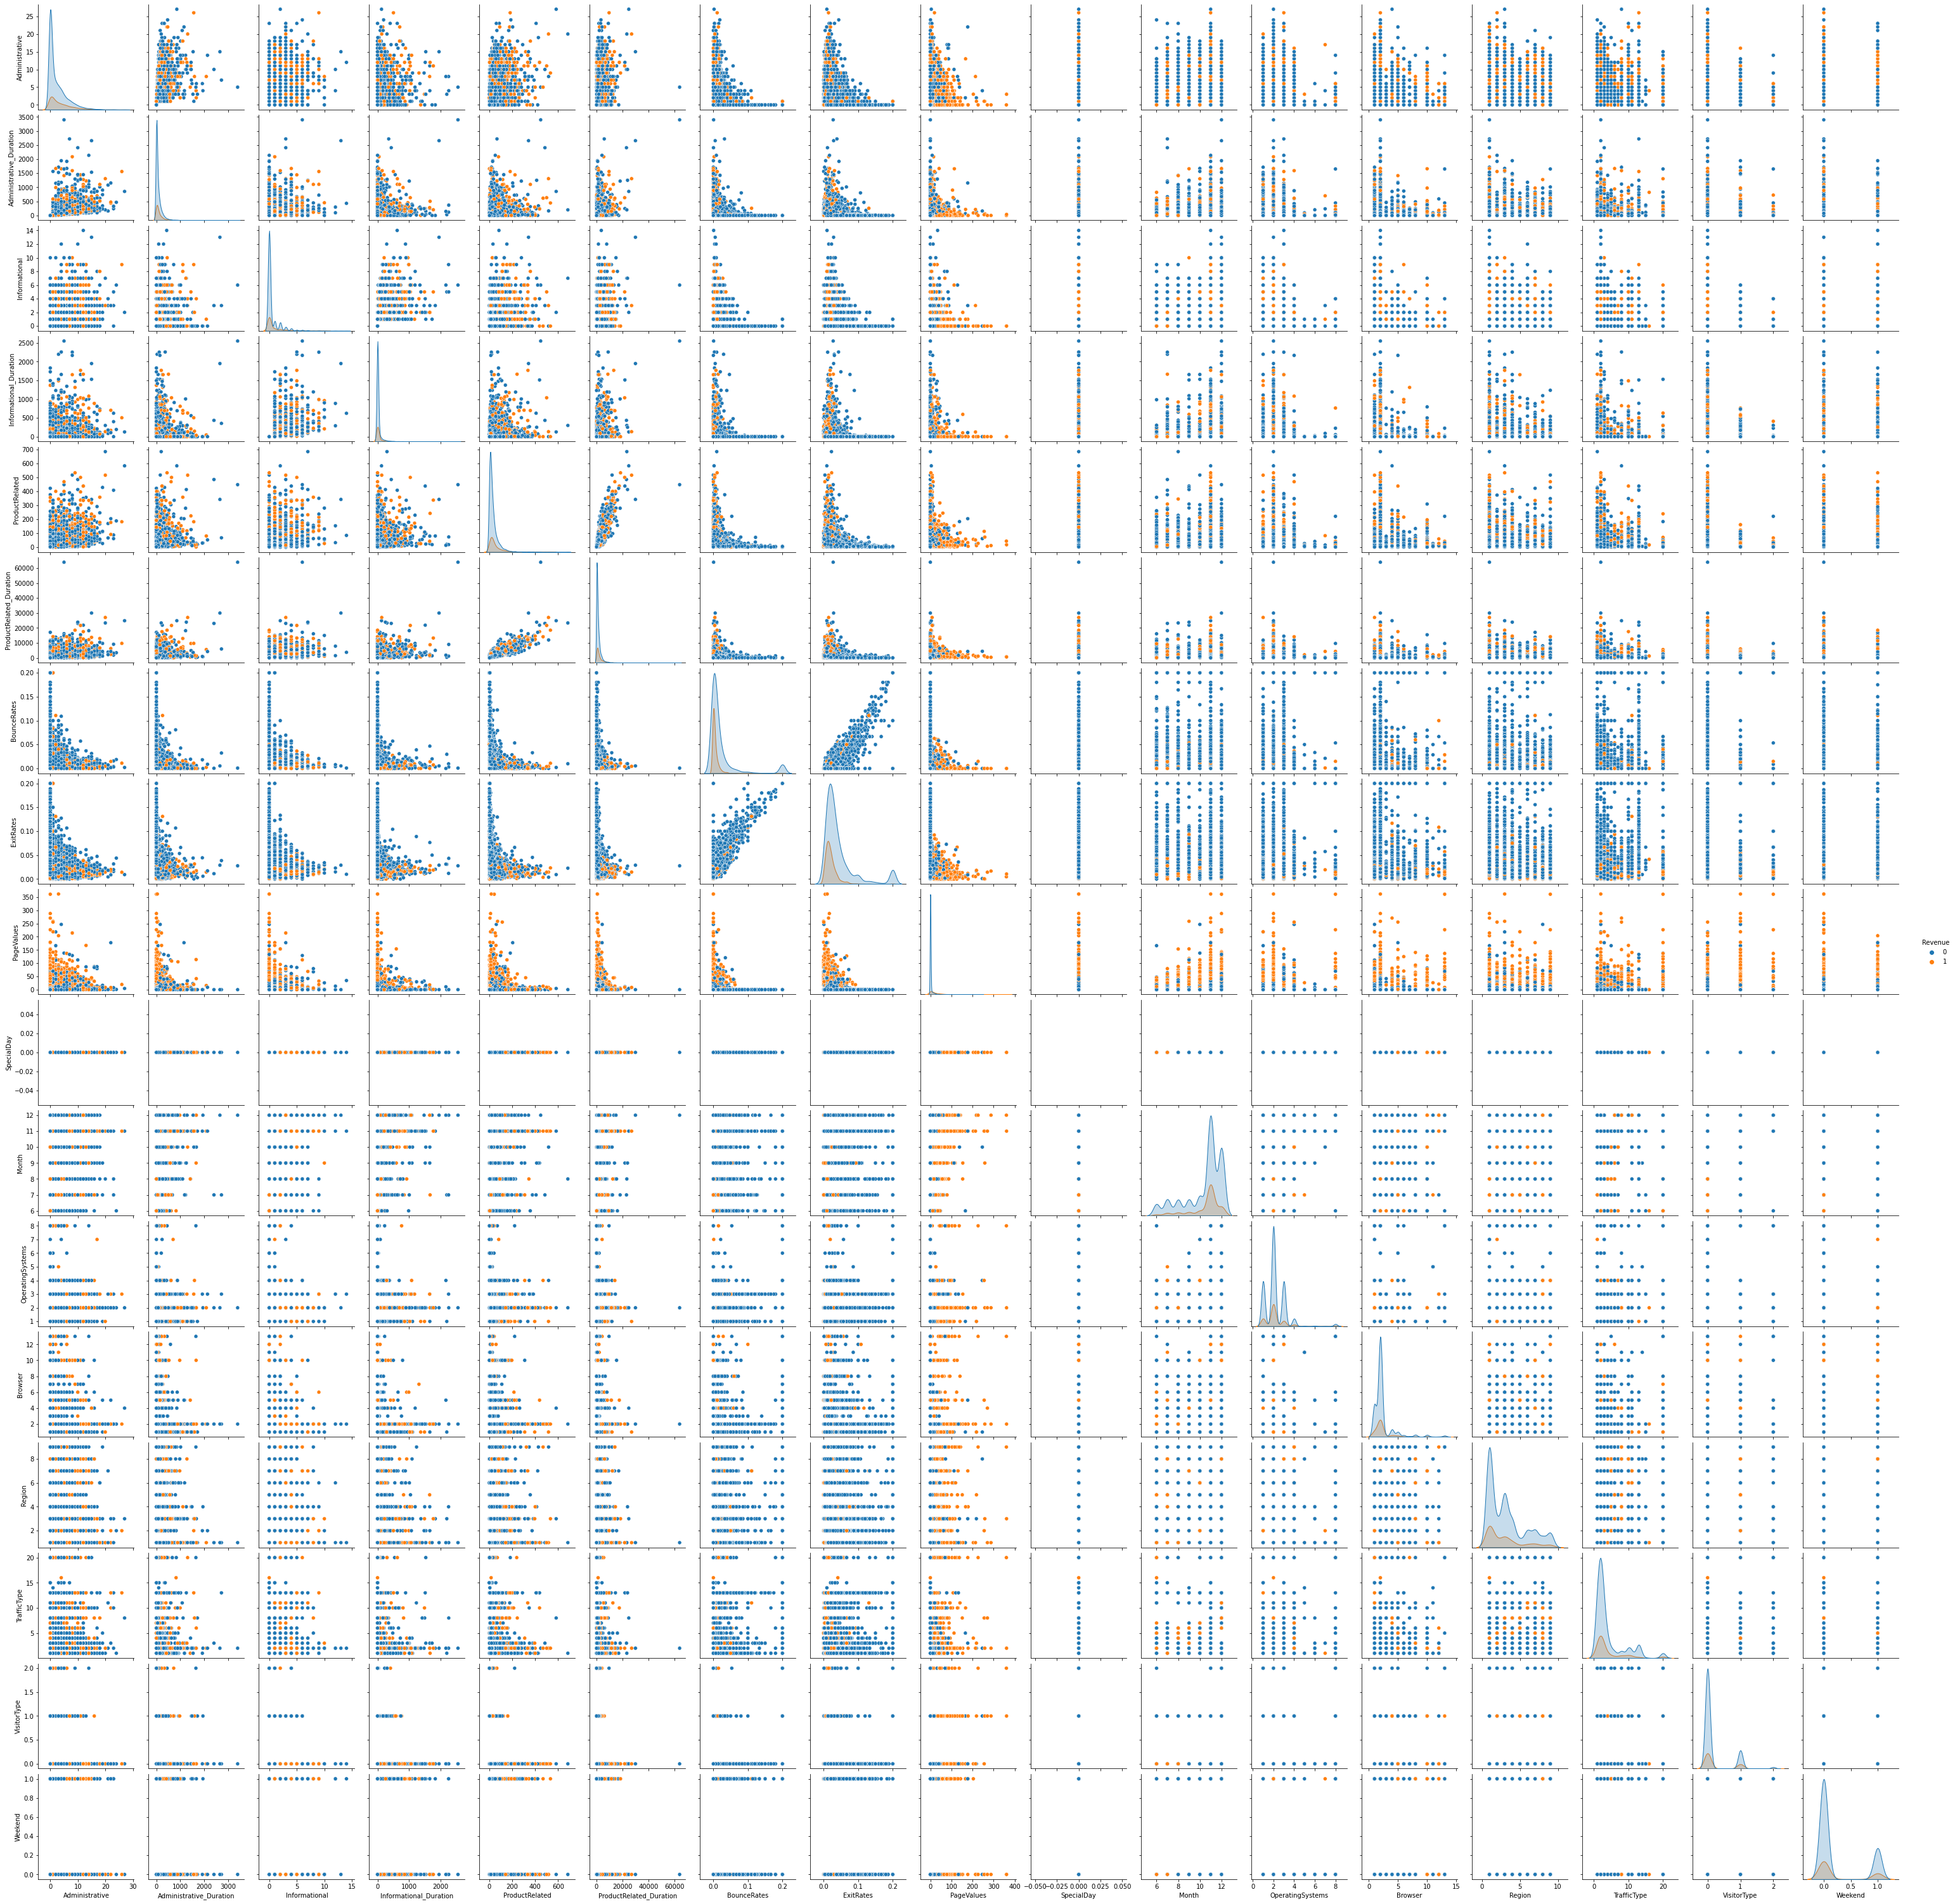

In [ ]:
# Data visualization:
#Distribution of features in training dataset and how they are correlated among themselves
sns.pairplot(train_df,hue='Revenue')
 



#Determining features in the training dataset which are highly correlated

In [ ]:
#for correlation using the training dataframe
train_df1.corr()


Administrative  ...   Weekend
Administrative                 1.000000  ...  0.006830
Administrative_Duration        0.593727  ...  0.009085
Informational                  0.361125  ...  0.035743
Informational_Duration         0.236805  ...  0.021766
ProductRelated                 0.410491  ...  0.001935
ProductRelated_Duration        0.353213  ... -0.005673
BounceRates                   -0.213037  ... -0.022237
ExitRates                     -0.295068  ... -0.035161
PageValues                     0.076138  ... -0.005634
SpecialDay                          NaN  ...       NaN
Month                         -0.040579  ...  0.018563
OperatingSystems              -0.014905  ...  0.005850
Browser                       -0.025829  ... -0.036545
Region                        -0.017684  ... -0.000752
TrafficType                   -0.051151  ... -0.005607
VisitorType                   -0.042983  ...  0.002631
Weekend                        0.006830  ...  1.000000

[17 rows x 17 columns]

In [ ]:
# For columns 'SpecialDay' lets look it closely
print(train_df1['SpecialDay'].value_counts())


0.0    6875
Name: SpecialDay, dtype: int64


# Since there are only '0' corresponding to False for 'SpecialDay' corr will come out to be NaN for this feature therefore, I will drop 'SpecialDay'  feature from the training dataset and then re-compute the correlation.





In [ ]:
# JG: Since there are only '0' corresponding to False , corr will come out to be NaN for this feature therefore, I will drop it and then re-compute the correlation.
train_df1_corr = train_df1.drop(['SpecialDay'],axis=1)
train_df1_corr.head()

Administrative  Administrative_Duration  ...  VisitorType  Weekend
5455               0                 0.000000  ...            0        0
5456               3                40.200000  ...            1        0
5457               1                63.400000  ...            1        0
5458               6               618.066667  ...            1        0
5459               0                 0.000000  ...            0        0

[5 rows x 16 columns]

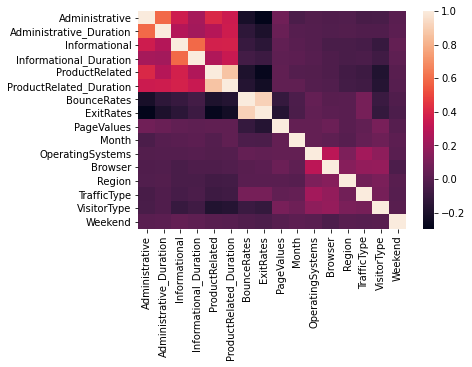

In [ ]:
train_cor = train_df1_corr.corr()
# Plot the correlation coefficients
sns.heatmap(train_cor)
plt.show()

In [ ]:
# From above plot it appears that the features " BounceRates" and "ExitRates" are highly coorelated, some correlation is there b/w featyures "ProductRelated" and "ProductRelated_Duration"
#Lets examine them and drop feature columns which have a high absolute Pearson Correlation
keep_columns = np.full((train_cor.shape[0],), True, dtype=bool)
all_columns = train_df1_corr.columns.to_list()
# Loop over all columns
for i in range(train_cor.shape[0]-1):
    # Loop over all columns to the right of the current one
    for j in range(i+1, train_cor.shape[0]-1):
        # If the absolute correlation between the current two columns is greater than or equal to 0.8, or no correlation 0 value...
        if (np.abs(train_cor.iloc[i,j]) >= 0.6):
            # If we haven't already told the keep_columns list to drop column j...
            if keep_columns[j]:
                # Drop column j
                keep_columns[j] = False
                print("Column to be dropped is =", all_columns[j], "correlated with column=", all_columns[i])
# Extract the columns to keep from the training df
selected_columns = train_df1_corr.columns[keep_columns]
# Make a new df with the columns we've decided to keep from the training df
train_df1_corr_filt = train_df1_corr[selected_columns]

print('The following columns are present in the new data:')
print(selected_columns)
print(f'The old data had {train_df1_corr.shape[1]} features. The new df has {train_df1_corr_filt.shape[1]} features.')
train_df1_corr_filt.head()


Column to be dropped is = ProductRelated_Duration correlated with column= ProductRelated
Column to be dropped is = ExitRates correlated with column= BounceRates
The following columns are present in the new data:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object')
The old data had 16 features. The new df has 14 features.


Administrative  Administrative_Duration  ...  VisitorType  Weekend
5455               0                 0.000000  ...            0        0
5456               3                40.200000  ...            1        0
5457               1                63.400000  ...            1        0
5458               6               618.066667  ...            1        0
5459               0                 0.000000  ...            0        0

[5 rows x 14 columns]

#JG:Features to be dropped are : 'ProductRelated_Duration' because it is  correlated with feature 'ProductRelated' and 'ExitRates' because it is correlated with 'BounceRates'. Therefore, the new \# of features reduces to 14 from 16.

#Feature scaling such that all features lie b/w 0 and 1

In [ ]:
#Obtain the test data features similar to train data features
test_df1_corr_filt = test_df1[selected_columns]
#Since these features are at different scales, let us first normalize them
scaler = MinMaxScaler()
train_df1_np = train_df1_corr_filt.to_numpy()
test_df1_np = test_df1_corr_filt.to_numpy()
print("Training dataset as numpy array=", train_df1_np.shape)
print("Test dataset as numpy array=", test_df1_np.shape)
#Mean of features before scaling
#Print mean value for each feature in training dataset
print('\n Before scaling mean of each feature in training dataset ', train_df1_np.mean(axis=0))
#Print mean value for each feature in test dataset
print('\n Before scaling mean of each feature in test dataset', test_df1_np.mean(axis=0))
# Scale them so all the features lie between [0,1]
x_train = scaler.fit_transform(train_df1_np)
x_test = scaler.fit_transform(test_df1_np)
print("\n Training dataset shape after scaling =", x_train.shape)
print("\n Test dataset shape after scaling=", x_test.shape, '\n')
# Verify that the features have been scaled
#Print mean value for each feature in training dataset
print('\n After scaling mean of each feature in training dataset \n', x_train.mean(axis=0))
#Print mean value for each feature in test dataset
print('\n After scaling mean of each feature in test dataset \n', x_test.mean(axis=0))

Training dataset as numpy array= (6875, 14)
Test dataset as numpy array= (2091, 14)

 Before scaling mean of each feature in training dataset  [2.65250909e+00 9.07414339e+01 5.76727273e-01 3.99612989e+01
 3.81543273e+01 1.93677990e-02 6.78222477e+00 1.03912727e+01
 2.14400000e+00 2.37425455e+00 3.19796364e+00 4.15214545e+00
 1.90836364e-01 2.39127273e-01]

 Before scaling mean of each feature in test dataset [1.76948828e+00 6.64481149e+01 3.91200383e-01 2.81845377e+01
 1.90497370e+01 2.39535321e-02 3.68959337e+00 2.91200383e+00
 2.06456241e+00 2.28168341e+00 3.00095648e+00 3.14299378e+00
 1.11429938e-01 2.43424199e-01]

 Training dataset shape after scaling = (6875, 14)

 Test dataset shape after scaling= (2091, 14) 


 After scaling mean of each feature in training dataset 
 [0.09824108 0.02669847 0.04119481 0.01567494 0.05561855 0.096839
 0.01874766 0.73187879 0.16342857 0.11452121 0.27474545 0.16590239
 0.09541818 0.23912727]

 After scaling mean of each feature in test dataset 
 [0

#Determination of each input feature's ranks/importance using Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Feature ranking:
1. feature 6 (0.311347)
2. feature 4 (0.109829)
3. feature 5 (0.081871)
4. feature 1 (0.070047)
5. feature 0 (0.068438)
6. feature 11 (0.061761)
7. feature 10 (0.058500)
8. feature 7 (0.049649)
9. feature 9 (0.040027)
10. feature 8 (0.038342)
11. feature 2 (0.036781)
12. feature 3 (0.034739)
13. feature 13 (0.019918)
14. feature 12 (0.018749)


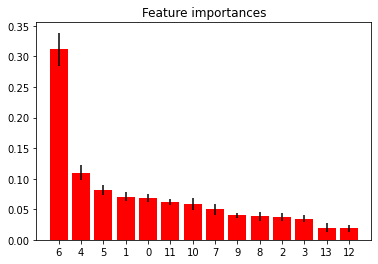

In [ ]:
#Use Random Forest to get feature ranks/importances for each feature
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()


In [ ]:
print(f"Top 2 features ranked are {selected_columns[4]} with feature ranking {importances[4]} and {selected_columns[6]} with feature ranking {importances[6]} ")
print(f"The lowest ranked feature is {selected_columns[12]} with feature ranking {importances[12]} ")

Top 2 features ranked are ProductRelated with feature ranking 0.10982871856933475 and PageValues with feature ranking 0.31134749829195413 
The lowest ranked feature is VisitorType with feature ranking 0.018748809488497633 


#Based on the above analysis, the "VisitorType" is the lowest ranked feature and could be dropped. However, I think that "VistorType" would determine if the product gets purchased or not for ex, if it is a returning customer there is a high likelihood that the customer would purchase compared to a new customer. Therefore, I would not drop features just based on the above analysis. It is good to have these ranks, so that it can help in debug and further tune the model for improving its performance if need arises. 

#Linear Classifier: Logisitic Regression
#Reasons: 
#1. Dataset size and \# of features are not large. 
#2. Time complexity is  O(mn) << Linear SVM (O(m^2) to O(m^3)) , m=\# of samples, n=\# of features.

In [ ]:
# Fitting a linear model: Logistic Regression  
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [ ]:
# Instantiate, train, and predict with Logistic Regression 
#since the dataset is imbalanced (Percentage of positive values in target= 12.507237984944991) using class_weight='balanced' so that the weights are assigned according to their frequencies
#i.e. minority class (positive) gets higher weights, majority class (negative) gets lower weights
lr_fit = LogisticRegression(random_state=42, class_weight='balanced',solver='liblinear').fit(x_train,np.ravel(y_train))
lr_predict = lr_fit.predict(x_test)

In [ ]:
#weights assigned (for understanding purpose only how class_weight='balanced' assigns weights based on frequencies of classes)
n_classes = 2
pos_class=1
neg_class=0
weight = y_train.shape[0]/(n_classes * np.bincount(np.ravel(y_train)))
print(f"Minority class {pos_class} gets weight {weight[1]} and majority class {neg_class} gets weight {weight[0]}")

Minority class 1 gets weight 2.5500741839762613 and majority class 0 gets weight 0.6219468065858513


In [ ]:
from sklearn import metrics
print('With default parameters the model accuracy is',lr_fit.score(x_test, y_test))

With default parameters the model accuracy is 0.8541367766618843


Accuracy = 0.8541367766618843, Precision = 0.38445378151260506, Recall = 0.9384615384615385, F1-score = 0.5454545454545454
Confusion Matrix is:
[[1603  293]
 [  12  183]]
Confusion matrix Plot
[[1603  293]
 [  12  183]]


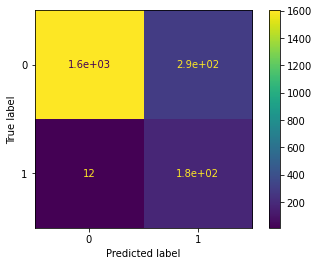

In [ ]:
#Evaluate predictions
cmlog = confusion_matrix(y_test, lr_predict)
acc   = accuracy(y_test, lr_predict)
rec   = recall(y_test, lr_predict)
prec  = precision(y_test, lr_predict)
f1    = f1_score(y_test, lr_predict)
# Print the metrics, display the confusion matrix
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
#plot_confusion_matrix(lr_fit,x_test,y_test)
#plt.show()
print("Confusion matrix Plot")
disp = plot_confusion_matrix(lr_fit,x_test,y_test)
print(disp.confusion_matrix)



In [ ]:
print(metrics.classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1896
           1       0.38      0.94      0.55       195

    accuracy                           0.85      2091
   macro avg       0.69      0.89      0.73      2091
weighted avg       0.94      0.85      0.88      2091



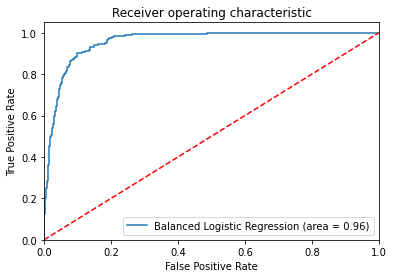

In [ ]:
probs = lr_fit.predict_proba(x_test)
preds_lr_fit = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_lr_fit)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Balanced Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Hyperparameter tuning for Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
pipe = Pipeline([('classifier', LogisticRegression())])
param_grid = {'classifier' : [LogisticRegression(random_state=42, class_weight='balanced')],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
# creating grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
#fit on data
best_clf_fit = clf.fit(x_train,np.ravel(y_train))
best_clf_predict = best_clf_fit.predict(x_test)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


In [ ]:
best_clf_fit.best_estimator_.get_params()['classifier']

LogisticRegression(C=0.012742749857031334, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_clf_fit.best_params_['classifier']

LogisticRegression(C=0.012742749857031334, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
print('Model accuracy is',best_clf_fit.score(x_test, y_test))

Model accuracy is 0.9473935915829746


Accuracy = 0.9473935915829746, Precision = 0.6556776556776557, Recall = 0.9179487179487179, F1-score = 0.764957264957265
Confusion Matrix is:
[[1802   94]
 [  16  179]]


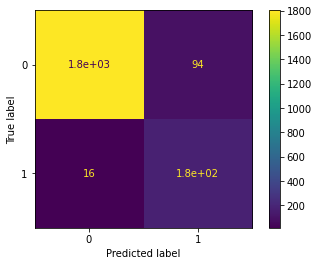

In [ ]:
#Evaluate predictions
cmlog = confusion_matrix(y_test, best_clf_predict)
acc   = accuracy(y_test, best_clf_predict)
rec   = recall(y_test, best_clf_predict)
prec  = precision(y_test, best_clf_predict)
f1    = f1_score(y_test, best_clf_predict)
# Print the metrics, display the confusion matrix
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
plot_confusion_matrix(best_clf_fit,x_test,y_test)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,best_clf_predict))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1896
           1       0.66      0.92      0.76       195

    accuracy                           0.95      2091
   macro avg       0.82      0.93      0.87      2091
weighted avg       0.96      0.95      0.95      2091



In [ ]:
#Hyperparameter tuning for Logistic Regression varying the regularization parameter C from -4,4 to -5,5 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
pipe = Pipeline([('classifier', LogisticRegression())])
param_grid = {'classifier' : [LogisticRegression(random_state=42, class_weight='balanced')],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-5, 5, 20),
    'classifier__solver' : ['liblinear'],
    'classifier__max_iter' : np.linspace(100,200,10)}
# creating grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
#fit on data
best_clf_fit = clf.fit(x_train,np.ravel(y_train))
best_clf_predict = best_clf_fit.predict(x_test)
print(metrics.classification_report(y_test,best_clf_predict))


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.5s


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1896
           1       0.65      0.94      0.77       195

    accuracy                           0.95      2091
   macro avg       0.82      0.94      0.87      2091
weighted avg       0.96      0.95      0.95      2091



[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   32.3s finished


In [ ]:
print("Grid scores on training set for Logistic Regression with hyperparameter tuning:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print(np.unique(means))

Grid scores on training set for Logistic Regression with hyperparameter tuning:

0.804 (+/-0.001) for {'classifier': LogisticRegression(C=0.01438449888287663, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100.0, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=42, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False), 'classifier__C': 1e-05, 'classifier__max_iter': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.402 (+/-0.248) for {'classifier': LogisticRegression(C=0.01438449888287663, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100.0, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=42, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False), 'classifier__C': 1e-05

In [ ]:
from sklearn import metrics
print('Model accuracy post hyperparameter tuning is',best_clf_fit.score(x_test, y_test))

Model accuracy post hyperparameter tuning is 0.9478718316594931


Accuracy = 0.9478718316594931, Precision = 0.6535714285714286, Recall = 0.9384615384615385, F1-score = 0.7705263157894736
Confusion Matrix is:
[[1799   97]
 [  12  183]]


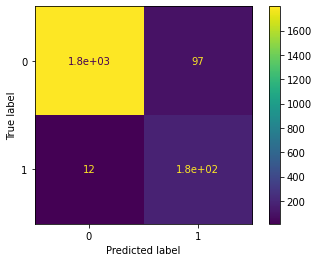

In [ ]:
#Evaluate predictions
cmlog = confusion_matrix(y_test, best_clf_predict)
acc   = accuracy(y_test, best_clf_predict)
rec   = recall(y_test, best_clf_predict)
prec  = precision(y_test, best_clf_predict)
f1    = f1_score(y_test, best_clf_predict)
# Print the metrics, display the confusion matrix
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
plot_confusion_matrix(best_clf_fit,x_test,y_test)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,best_clf_predict))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1896
           1       0.65      0.94      0.77       195

    accuracy                           0.95      2091
   macro avg       0.82      0.94      0.87      2091
weighted avg       0.96      0.95      0.95      2091



In [ ]:
data = {
    'accuracy': [accuracy(y_test, best_clf_predict), accuracy(y_test, lr_predict)],
    'precision': [precision(y_test, best_clf_predict), precision(y_test, lr_predict)],
    'recall': [recall(y_test,best_clf_predict), recall(y_test, lr_predict)],
    'f1 score': [f1_score(y_test, best_clf_predict), f1_score(y_test, lr_predict)]
}
print("Logistic Regression Results: Hyper parameter tuned vs not tuned")
pd.DataFrame.from_dict(data, orient='index', columns=[' LR_ tuned', 'LR_not_tuned'])

Logistic Regression Results: Hyper parameter tuned vs not tuned


LR_ tuned  LR_not_tuned
accuracy     0.947872      0.854137
precision    0.653571      0.384454
recall       0.938462      0.938462
f1 score     0.770526      0.545455

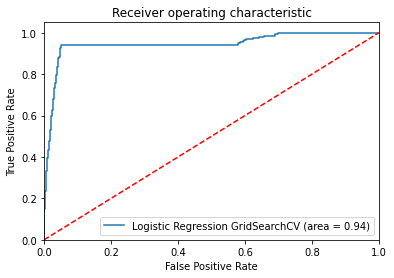

In [ ]:
# ROC/AUC for positive class
probs = best_clf_fit.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_hyp_fit = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression GridSearchCV (area = %0.2f)' % roc_auc_hyp_fit)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Results:
#Linear Classifier: Logistic Regression before vs after hyper parameter tuning

In [ ]:
#Printing the results of logistic regression classifier before vs after hyper parameter tuning
#No hyperparameter tuning
print("Without hyperparameter tunining: Logistic Regression Classifier outputs:\n", metrics.classification_report(y_test,lr_predict))
#With hyperparameter tuning, parameters tuned are: penalty, regularization parameter C,  and solver=liblinear instead of default lbfgs which only handles L2 penalty
print("With hyperparameter tuning: Logistic Regression Classifier outputs:\n", metrics.classification_report(y_test,best_clf_predict))
print("Parameters obtained for the best fit identified:\n")
best_clf_fit.best_estimator_.get_params()['classifier']

Without hyperparameter tunining: Logistic Regression Classifier outputs:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      1896
           1       0.38      0.94      0.55       195

    accuracy                           0.85      2091
   macro avg       0.69      0.89      0.73      2091
weighted avg       0.94      0.85      0.88      2091

With hyperparameter tuning: Logistic Regression Classifier outputs:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1896
           1       0.65      0.94      0.77       195

    accuracy                           0.95      2091
   macro avg       0.82      0.94      0.87      2091
weighted avg       0.96      0.95      0.95      2091

Parameters obtained for the best fit identified:



LogisticRegression(C=0.01438449888287663, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100.0, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=42, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
print('Without hyperparameter tuning the roc_auc=',roc_auc)

Without hyperparameter tuning the roc_auc= 0.9576977171913881


In [ ]:
print('With hyperparameter tuning the roc_auc=',roc_auc_hyp_fit)

With hyperparameter tuning the roc_auc= 0.944436330195824


In [ ]:
print("With no tuning of parameters the model accuracy is:",lr_fit.score(x_test,y_test))


With no tuning of parameters the model accuracy is: 0.8541367766618843


In [ ]:
from sklearn import metrics
print("With hyperparameter tuning the model accuracy is:", best_clf_fit.score(x_test,y_test))

With hyperparameter tuning the model accuracy is: 0.9478718316594931


In [ ]:
data = {
    'accuracy': [accuracy(y_test, best_clf_predict), accuracy(y_test, lr_predict)],
    'precision': [precision(y_test, best_clf_predict), precision(y_test, lr_predict)],
    'recall': [recall(y_test,best_clf_predict), recall(y_test, lr_predict)],
    'f1 score': [f1_score(y_test, best_clf_predict), f1_score(y_test, lr_predict)]
}
print("Logistic Regression Results: Hyper parameter tuned vs not tuned")
pd.DataFrame.from_dict(data, orient='index', columns=[' LR_ tuned', 'LR_not_tuned'])

Logistic Regression Results: Hyper parameter tuned vs not tuned


LR_ tuned  LR_not_tuned
accuracy     0.947872      0.854137
precision    0.653571      0.384454
recall       0.938462      0.938462
f1 score     0.770526      0.545455

# Conclusions: 
#Linear Classifier: Logistic Regression: Without vs With hyperparameter tuning
#1: Precision and F1-score for both the positive and negative classes improve post hyperparameter tuning. Model accuracy improves post-hyper parameter tuning.

#2.Hyperparameters influencing the results appear to be: C (regularization) and penalty(L1). Varying the number of iterations don't change the classification results.

#3: AUC for Logistic Regression classifier slightly worsens post-hyper parameter tuning from 95.7% to 94.4%. 

#4: Moreover, the classification report also confirms that the hyper parameter tuned model gives better precision, accuracy and F1-score for positive class. However, recall doesn't change => prediction of positive class that actually belong to the positive clas improves with no change to the positive class predictions made out of all the positive examples in the dataset.
 

#Non-linear Classifier: Kernel SVM (Poly/RBF)
#Reasons:
#1.Can learn complex nonlinear functions. Able to find the "best" margin that separates the classes.
#2. Risk of overfitting is less.
#3.Number of training samples and features is not too large, thus, performs better compared to other nonlinear classifiers.

In [ ]:
from sklearn.svm import SVC

pipe_svc = Pipeline([('classifier', SVC())])
param_grid_svc = {'classifier': [SVC(kernel='poly',class_weight='balanced',random_state=42, probability=True)],'classifier__gamma':[1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],'classifier__C':[1,10,100,1000]}
# creating grid search object
svc_clf = GridSearchCV(pipe_svc, param_grid = param_grid_svc, cv=5, verbose=True, n_jobs=-1)
#fit on data
best_svc_clf_fit = svc_clf.fit(x_train,np.ravel(y_train))
best_svc_clf_predict = best_svc_clf_fit.predict(x_test)
print(best_svc_clf_fit.best_estimator_.get_params()['classifier'])
print("For Nonlinear SVM Classifier with Poly Kernel:\n")
print(metrics.classification_report(y_test,best_svc_clf_predict))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 12.9min finished


SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
For Nonlinear SVM Classifier with Poly Kernel:

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1896
           1       0.48      0.94      0.63       195

    accuracy                           0.90      2091
   macro avg       0.74      0.92      0.79      2091
weighted avg       0.95      0.90      0.91      2091




For Nonlinear SVM Classifier with Poly Kernel:

Accuracy = 0.8981348637015782, Precision = 0.47668393782383417, Recall = 0.9435897435897436, F1-score = 0.6333907056798623
Confusion Matrix is:
[[1694  202]
 [  11  184]]
Confusion matrix Plot
[[1694  202]
 [  11  184]]


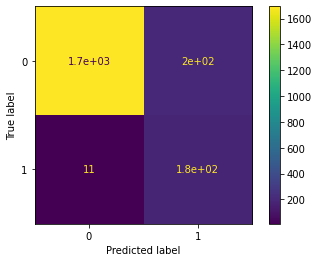

In [ ]:
#Evaluate predictions
cmlog = confusion_matrix(y_test, best_svc_clf_predict)
acc   = accuracy(y_test, best_svc_clf_predict)
rec   = recall(y_test, best_svc_clf_predict)
prec  = precision(y_test, best_svc_clf_predict)
f1    = f1_score(y_test, best_svc_clf_predict)
# Print the metrics, display the confusion matrix
print()
print("For Nonlinear SVM Classifier with Poly Kernel:\n")
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
print("Confusion matrix Plot")
disp = plot_confusion_matrix(best_svc_clf_fit,x_test,y_test)
print(disp.confusion_matrix)

In [ ]:
print("Grid scores on training set for nonlinear SVC with Poly kernel:")
print()
means = svc_clf.cv_results_['mean_test_score']
stds = svc_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svc_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Grid scores on training set for nonlinear SVC with Poly kernel:

0.196 (+/-0.001) for {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False), 'classifier__C': 1, 'classifier__gamma': 0.0001}
0.196 (+/-0.001) for {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False), 'classifier__C': 1, 'classifier__gamma': 0.001}
0.196 (+/-0.001) for {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.00

In [ ]:
from sklearn import metrics
print('Model accuracy for tuned SVM classifier with Poly kernel is',best_svc_clf_fit.score(x_test, y_test))

Model accuracy for tuned SVM classifier with Poly kernel is 0.8981348637015782


With Poly SVC the roc_auc= 0.9638429081467056


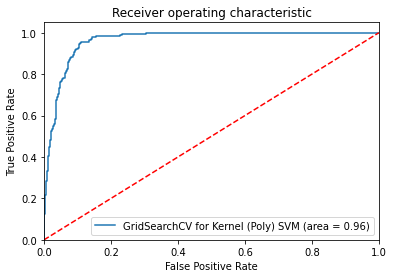

In [ ]:
# ROC/AUC for positive class
probs_svc_poly = best_svc_clf_fit.predict_proba(x_test)
preds_svc_poly = probs_svc_poly[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_svc_poly)
roc_auc_hyp_poly_fit = metrics.auc(fpr, tpr)
print('With Poly SVC the roc_auc=',roc_auc_hyp_poly_fit)
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV for Kernel (Poly) SVM (area = %0.2f)' % roc_auc_hyp_poly_fit)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.svm import SVC

pipe_svc = Pipeline([('classifier', SVC())])
param_grid_svc = {'classifier': [SVC(class_weight='balanced',random_state=42,probability=True)],'classifier__gamma':[1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],'classifier__C':[1,10,100,1000]}
# creating grid search object
svc_rbf_clf = GridSearchCV(pipe_svc, param_grid = param_grid_svc, cv=5, verbose=True, n_jobs=-1)
#fit on data
best_svc_rbf_clf_fit = svc_rbf_clf.fit(x_train,np.ravel(y_train))
best_svc_rbf_clf_predict = best_svc_rbf_clf_fit.predict(x_test)
print()
print(best_svc_rbf_clf_fit.best_estimator_.get_params()['classifier'])
print("For Nonlinear SVM Classifier with RBF Kernel:\n")
print(metrics.classification_report(y_test,best_svc_rbf_clf_predict))



Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 15.9min finished



SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=True, random_state=42,
    shrinking=True, tol=0.001, verbose=False)
For Nonlinear SVM Classifier with RBF Kernel:

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1896
           1       0.59      0.92      0.72       195

    accuracy                           0.93      2091
   macro avg       0.79      0.93      0.84      2091
weighted avg       0.95      0.93      0.94      2091




For Nonlinear SVM Classifier with RBF Kernel:

Accuracy = 0.9325681492109039, Precision = 0.5882352941176471, Recall = 0.9230769230769231, F1-score = 0.7185628742514971
Confusion Matrix is:
[[1770  126]
 [  15  180]]
Confusion matrix Plot
[[1770  126]
 [  15  180]]


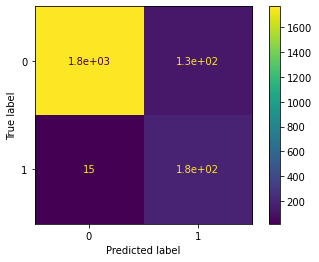

In [ ]:
#Evaluate predictions
cmlog = confusion_matrix(y_test, best_svc_rbf_clf_predict)
acc   = accuracy(y_test, best_svc_rbf_clf_predict)
rec   = recall(y_test, best_svc_rbf_clf_predict)
prec  = precision(y_test, best_svc_rbf_clf_predict)
f1    = f1_score(y_test, best_svc_rbf_clf_predict)
# Print the metrics, display the confusion matrix
print()
print("For Nonlinear SVM Classifier with RBF Kernel:\n")
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
print("Confusion matrix Plot")
disp = plot_confusion_matrix(best_svc_rbf_clf_fit,x_test,y_test)
print(disp.confusion_matrix)

In [ ]:
print("Grid scores on training set for nonlinear SVC with RBF kernel:")
print()
means = svc_rbf_clf.cv_results_['mean_test_score']
stds = svc_rbf_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svc_rbf_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Grid scores on training set for nonlinear SVC with RBF kernel:

0.196 (+/-0.001) for {'classifier': SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=True, random_state=42,
    shrinking=True, tol=0.001, verbose=False), 'classifier__C': 1, 'classifier__gamma': 0.0001}
0.201 (+/-0.006) for {'classifier': SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=True, random_state=42,
    shrinking=True, tol=0.001, verbose=False), 'classifier__C': 1, 'classifier__gamma': 0.001}
0.526 (+/-0.091) for {'classifier': SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=True, random_state=42,
    shrinking=True, to

In [ ]:
from sklearn import metrics
print('Model accuracy for tuned SVM classifier with RBF kernel is',best_svc_rbf_clf_fit.score(x_test, y_test))

Model accuracy for tuned SVM classifier with RBF kernel is 0.9325681492109039


With Kernel SVC the roc_auc= 0.97303364708428


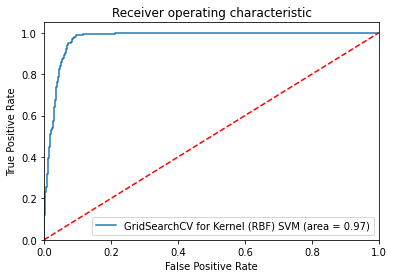

In [ ]:
# ROC/AUC for positive class
probs_svc_rbf = best_svc_rbf_clf_fit.predict_proba(x_test)
preds_svc_rbf = probs_svc_rbf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_svc_rbf)
roc_auc_hyp_fit_rbf = metrics.auc(fpr, tpr)
print('With Kernel SVC the roc_auc=',roc_auc_hyp_fit_rbf)
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV for Kernel (RBF) SVM (area = %0.2f)' % roc_auc_hyp_fit_rbf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
data = {
    'accuracy': [accuracy(y_test, best_svc_clf_predict), accuracy(y_test, best_svc_rbf_clf_predict)],
    'precision': [precision(y_test, best_svc_clf_predict), precision(y_test, best_svc_rbf_clf_predict)],
    'recall': [recall(y_test,best_svc_clf_predict), recall(y_test, best_svc_rbf_clf_predict)],
    'f1 score': [f1_score(y_test, best_svc_clf_predict), f1_score(y_test, best_svc_rbf_clf_predict)]
}
print("Kernel SVM Results: Poly vs RBF")
pd.DataFrame.from_dict(data, orient='index', columns=[' KSVM_POLY', 'KSVM_RBF'])

Kernel SVM Results: Poly vs RBF


KSVM_POLY  KSVM_RBF
accuracy     0.898135  0.932568
precision    0.476684  0.588235
recall       0.943590  0.923077
f1 score     0.633391  0.718563

#Results: Nonlinear Classifier: Kernel SVM (Poly/RBF Kernels)


For Nonlinear SVM Classifier with Poly Kernel:
Model accuracy for tuned SVM classifier with Poly kernel is 0.8981348637015782
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1896
           1       0.48      0.94      0.63       195

    accuracy                           0.90      2091
   macro avg       0.74      0.92      0.79      2091
weighted avg       0.95      0.90      0.91      2091

With Poly SVC the roc_auc= 0.9638429081467056
For Nonlinear SVM Classifier with RBF Kernel:
Model accuracy for tuned SVM classifier with RBF kernel is 0.9325681492109039
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1896
           1       0.59      0.92      0.72       195

    accuracy                           0.93      2091
   macro avg       0.79      0.93      0.84      2091
weighted avg       0.95      0.93      0.94      2091

With RBF Kernel SVC the roc_auc= 0.97303364708428


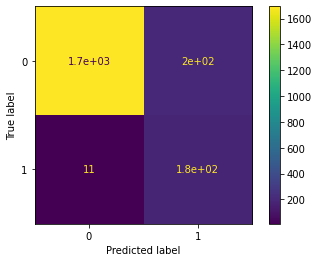

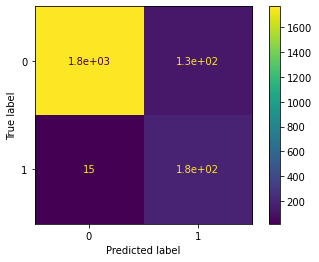

In [ ]:
print("For Nonlinear SVM Classifier with Poly Kernel:")
print('Model accuracy for tuned SVM classifier with Poly kernel is',best_svc_clf_fit.score(x_test, y_test))
print(metrics.classification_report(y_test,best_svc_clf_predict))
print('With Poly SVC the roc_auc=',roc_auc_hyp_poly_fit)

print("For Nonlinear SVM Classifier with RBF Kernel:")
print('Model accuracy for tuned SVM classifier with RBF kernel is',best_svc_rbf_clf_fit.score(x_test, y_test))
print(metrics.classification_report(y_test,best_svc_rbf_clf_predict))
print('With RBF Kernel SVC the roc_auc=',roc_auc_hyp_fit_rbf)

print("Confusion matrix Plot for Poly Kernel SVM")
disp_poly = plot_confusion_matrix(best_svc_clf_fit,x_test,y_test)
print(disp_poly.confusion_matrix)

print("Confusion matrix Plot for RBF Kernel SVM")
disp_rbf = plot_confusion_matrix(best_svc_rbf_clf_fit,x_test,y_test)
print(disp_rbf.confusion_matrix)

In [ ]:
from sklearn import metrics
print('Model accuracy for Kernel SVM (rbf) is',best_svc_rbf_clf_fit.score(x_test, y_test))

Model accuracy for Kernel SVM (rbf) is 0.9325681492109039


In [ ]:
data = {
    'accuracy': [accuracy(y_test, best_svc_clf_predict), accuracy(y_test, best_svc_rbf_clf_predict)],
    'precision': [precision(y_test, best_svc_clf_predict), precision(y_test, best_svc_rbf_clf_predict)],
    'recall': [recall(y_test,best_svc_clf_predict), recall(y_test, best_svc_rbf_clf_predict)],
    'f1 score': [f1_score(y_test, best_svc_clf_predict), f1_score(y_test, best_svc_rbf_clf_predict)]
}
print("Kernel SVM Results: Poly vs RBF")
pd.DataFrame.from_dict(data, orient='index', columns=[' KSVM_POLY', 'KSVM_RBF'])

Kernel SVM Results: Poly vs RBF


KSVM_POLY  KSVM_RBF
accuracy     0.898135  0.932568
precision    0.476684  0.588235
recall       0.943590  0.923077
f1 score     0.633391  0.718563

#Conclusions:
#Non-linear Classifier: Kernel SVM (Poly/RBF)
#1:Kernel SVM classifier with 'rbf' kernel performs superior than the 'poly' kernel in predicting 'positive' class as desired for this imbalanced dataset.
#2:Model accuracy, roc_auc score, and f1-score improve significantly for the 'positive class' with Kernel SVM (rbf) as shown above. Therefore, Kernel SVM (rbf) would be the preferred non-linear classifer for this case.

#Summary:
#Optimal Feature set contains 14 features named: 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month', and  'Weekend'.
#Classification performance:


In [ ]:
data = {
    'accuracy': [ accuracy(y_test, lr_predict), accuracy(y_test, best_clf_predict), accuracy(y_test, best_svc_clf_predict), accuracy(y_test, best_svc_rbf_clf_predict)],
    'precision': [ precision(y_test, lr_predict),precision(y_test, best_clf_predict), precision(y_test, best_svc_clf_predict), precision(y_test, best_svc_rbf_clf_predict)],
    'recall': [ recall(y_test, lr_predict), recall(y_test,best_clf_predict), recall(y_test,best_svc_clf_predict), recall(y_test, best_svc_rbf_clf_predict)],
    'f1 score': [ f1_score(y_test, lr_predict), f1_score(y_test, best_clf_predict), f1_score(y_test, best_svc_clf_predict), f1_score(y_test, best_svc_rbf_clf_predict)],
    'roc_auc': [roc_auc,roc_auc_hyp_fit,roc_auc_hyp_poly_fit, roc_auc_hyp_fit_rbf]
}

print("Results: Linear and Non-linear Classifiers")
pd.DataFrame.from_dict(data, orient='index', columns=['LR_not_tuned', 'LR_tuned', 'KSVM_POLY', 'KSVM_RBF'])

Results: Linear and Non-linear Classifiers


LR_not_tuned  LR_tuned  KSVM_POLY  KSVM_RBF
accuracy       0.854137  0.947872   0.898135  0.932568
precision      0.384454  0.653571   0.476684  0.588235
recall         0.938462  0.938462   0.943590  0.923077
f1 score       0.545455  0.770526   0.633391  0.718563
roc_auc        0.957698  0.944436   0.963843  0.973034

#Based on the above comparison, the best performance with regards to separating the postive and negative classes, among the chosen linear/non-linear classifier is the RBF Kernel SVM classifier with roc_auc of 0.97.

In [ ]:
#Verification using AutoML


#TPOT for classification

In [ ]:
!pip install tpot

In [ ]:
# TPOT for classification
from tpot import TPOTClassifier
# Instantiate and train a TPOT auto-ML classifier
# Setting generations to 5, population_size to 40, and verbosity to 2 (to see each generation's performance)
tpot = TPOTClassifier(generations=5, population_size=40, verbosity=2, random_state=42)
tpot.fit(x_train, y_train)
# Evaluate the classifier on the test data
# By default, the scoring function is accuracy
print(tpot.score(x_test, y_test))
tpot.export('tpot_products_pipeline.py')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Generation 1 - Current best internal CV score: 0.8708363636363636

Generation 2 - Current best internal CV score: 0.8708363636363636

Generation 3 - Current best internal CV score: 0.8734545454545455

Generation 4 - Current best internal CV score: 0.8734545454545455

Generation 5 - Current best internal CV score: 0.8734545454545455

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=10, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)
0.9459588713534194


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1896
           1       0.81      0.37      0.51       195

    accuracy                           0.93      2091
   macro avg       0.88      0.68      0.74      2091
weighted avg       0.93      0.93      0.92      2091


For Nonlinear Classifier with GradientBoostingClassifier:

Accuracy = 0.9335246293639407, Precision = 0.8111111111111111, Recall = 0.37435897435897436, F1-score = 0.5122807017543859
Confusion Matrix is:
[[1879   17]
 [ 122   73]]
Confusion matrix Plot
[[1879   17]
 [ 122   73]]


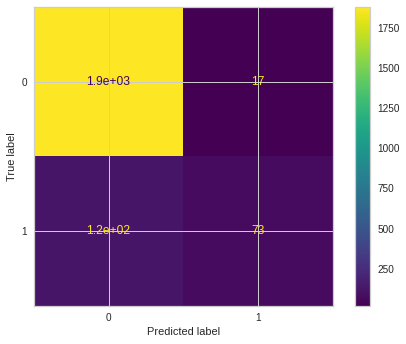

In [ ]:
# Using XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
et_clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=10,n_estimators=100,subsample=0.95, random_state=1)
et_clf_fit = et_clf.fit(x_train,y_train)
et_clf_predict = et_clf.predict(x_test)
print(metrics.classification_report(y_test,et_clf_predict))
#Evaluate predictions
cmlog = confusion_matrix(y_test, et_clf_predict)
acc   = accuracy(y_test, et_clf_predict)
rec   = recall(y_test, et_clf_predict)
prec  = precision(y_test, et_clf_predict)
f1    = f1_score(y_test, et_clf_predict)
# Print the metrics, display the confusion matrix
print()
print("For Nonlinear Classifier with GradientBoostingClassifier:\n")
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
print("Confusion matrix Plot")
disp = plot_confusion_matrix(et_clf_fit,x_test,y_test)
print(disp.confusion_matrix)

With GradientBoostingClassifier the roc_auc= 0.9590338634642432


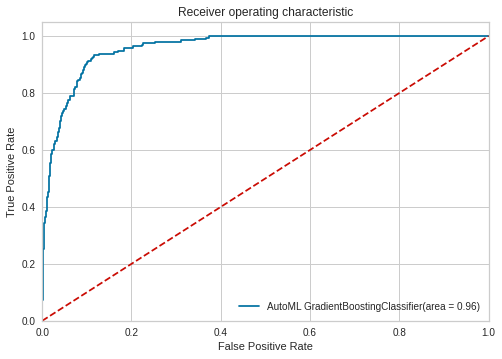

In [ ]:
# ROC/AUC for positive class
probs_etc_rbf = et_clf_fit.predict_proba(x_test)
preds_etc_rbf = probs_etc_rbf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_etc_rbf)
roc_auc_hyp_fit_etc = metrics.auc(fpr, tpr)
print('With GradientBoostingClassifier the roc_auc=',roc_auc_hyp_fit_etc)
plt.figure()
plt.plot(fpr, tpr, label='AutoML GradientBoostingClassifier(area = %0.2f)' % roc_auc_hyp_fit_etc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn import metrics
print('Model accuracy for AutoML identified GradientBoosting classifier is',et_clf_fit.score(x_test, y_test))

Model accuracy for AutoML identified GradientBoosting classifier is 0.9335246293639407


In [ ]:
#Comparing performance of Kernel SVM (rbf) vs GradientBoostingClassifier
data = {
    'accuracy': [accuracy(y_test, best_svc_rbf_clf_predict),accuracy(y_test, et_clf_predict) ],
    'precision': [precision(y_test, best_svc_rbf_clf_predict), precision(y_test, et_clf_predict) ],
    'recall': [ recall(y_test, best_svc_rbf_clf_predict), recall(y_test,et_clf_predict)],
    'f1 score': [f1_score(y_test, best_svc_rbf_clf_predict), f1_score(y_test, et_clf_predict)],'roc_auc':[roc_auc_hyp_fit_rbf, roc_auc_hyp_fit_etc]
}
print("Results: Kernel SVM (rbf) vs GradientBoostingClassifier")
pd.DataFrame.from_dict(data, orient='index', columns=[' KSVM_RBF', 'XGB_CLASS'])

Results: Kernel SVM (rbf) vs GradientBoostingClassifier


KSVM_RBF  XGB_CLASS
accuracy    0.932568   0.933525
precision   0.588235   0.811111
recall      0.923077   0.374359
f1 score    0.718563   0.512281
roc_auc     0.973034   0.959034

#Using AutoML the "GradientBoostingClassifier" is identified as the best classifier. 
#The accuracy of the GradientBoosting Classifer and Kernel SVM (rbf) are similar.
#However, the precision for the former is: 81.1% which is higher than the latter with 58.8%. 
#Moreover, the roc_auc for Kernel SVM (rbf) is  higher than the "GradientBoostingClassifier" which implies that the Kernel SVM (rbf) model does a good job in separating the classes.
#However, recall is lower for the "GradientBoostingClassifier".  
#Since, some of the metrics are better/worse for "GradientBoostingClassifer" than the Kernel SVM (rbf), therefore, in my opinion, it is the business need which will drive which of these two models to be chosen for classification purposes.

#Task2: User behavior clusters based on the purchasing behavior data for the complete dataset

In [ ]:
#Setting up the data for cluster analysis
'''X_df = df.drop(['Revenue'],axis=1)
Y_df = df.loc[:,['Revenue']]
print(X_df.shape)
print(Y_df.shape)
print(X_df.dtypes)
print(Y_df.dtypes)'''

"X_df = df.drop(['Revenue'],axis=1)\nY_df = df.loc[:,['Revenue']]\nprint(X_df.shape)\nprint(Y_df.shape)\nprint(X_df.dtypes)\nprint(Y_df.dtypes)"

In [ ]:
#Converting non-numeric datatypes to numeric 
non_numeric_columns = list(df.select_dtypes(include='object'))
print("Non-numeric columns are=",non_numeric_columns)        
bool_columns = list(df.select_dtypes(include='bool'))
print("Boolean columns are=", bool_columns)    

for col in non_numeric_columns:
   print("Non-numeric columns are=\n",  df[col].value_counts())

for col in bool_columns:
   print("Boolean columns are=\n",  df[col].value_counts())

df_lab = pd.DataFrame()
df_lab = df.copy()
print(df_lab.Month.value_counts())

print("Before labeling input data set months/counts=\n",df_lab.Month.value_counts())
print()
print("Input data set shape before labeling=\n", df_lab.shape)
print()


Non-numeric columns are= ['Month', 'VisitorType']
Boolean columns are= ['Weekend', 'Revenue']
Non-numeric columns are=
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Non-numeric columns are=
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Boolean columns are=
 False    9462
True     2868
Name: Weekend, dtype: int64
Boolean columns are=
 False    10422
True      1908
Name: Revenue, dtype: int64
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Before labeling input data set months/counts=
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Input data set shape before labeling=
 (12330, 18)



In [ ]:
#Updating month columns based on above output
month_col = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
month_num = [1,2,3,4,5,6,7,8,9,10,11,12]

df_lab['Month'] = df_lab['Month'].replace(month_col, month_num)

print("Input data set shape after labeling=\n", df_lab.shape)
print()
print("After labeling input data set months/counts=\n",df_lab.Month.value_counts())
print()
# Labeling visitor types
visitor_type = ['Returning_Visitor', 'New_Visitor', 'Other']
print("Before labeling input data set VisitorType/counts=\n",df_lab.VisitorType.value_counts())
print()

df_lab['VisitorType'] = df_lab['VisitorType'].replace(visitor_type, [0,1,2])

print("After labeling input data set VisitorType/counts=\n",df_lab.VisitorType.value_counts())
print()

Input data set shape after labeling=
 (12330, 18)

After labeling input data set months/counts=
 5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

Before labeling input data set VisitorType/counts=
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

After labeling input data set VisitorType/counts=
 0    10551
1     1694
2       85
Name: VisitorType, dtype: int64



In [ ]:
#Labeling boolean columns
for col in bool_columns:
  print(f"Before labeling input data set {col}/counts=\n",df_lab[col].value_counts())
 

for col in bool_columns:
  df_lab[col] = df_lab[col] * 1
  

for col in bool_columns:
  print(f"After labeling input data set {col}/counts=\n",df_lab[col].value_counts())
  



Before labeling input data set Weekend/counts=
 0    9462
1    2868
Name: Weekend, dtype: int64
Before labeling input data set Revenue/counts=
 0    10422
1     1908
Name: Revenue, dtype: int64
After labeling input data set Weekend/counts=
 0    9462
1    2868
Name: Weekend, dtype: int64
After labeling input data set Revenue/counts=
 0    10422
1     1908
Name: Revenue, dtype: int64


In [ ]:
#List datatypes of all features in the labelled input dataset
print(df_lab.dtypes)


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object


In [ ]:
#Generating user-behavior based on purchasing behavior data
X_df = df_lab.drop(columns=['Revenue'])
print("Input feature dataset=",X_df.shape)
Y_df = df_lab.loc[:,['Revenue']]
print("Target feature dataset=",Y_df.shape)

Input feature dataset= (12330, 17)
Target feature dataset= (12330, 1)


In [ ]:
#Display the statistics
df_lab.describe()

Administrative  Administrative_Duration  ...       Weekend       Revenue
count    12330.000000             12330.000000  ...  12330.000000  12330.000000
mean         2.315166                80.818611  ...      0.232603      0.154745
std          3.321784               176.779107  ...      0.422509      0.361676
min          0.000000                 0.000000  ...      0.000000      0.000000
25%          0.000000                 0.000000  ...      0.000000      0.000000
50%          1.000000                 7.500000  ...      0.000000      0.000000
75%          4.000000                93.256250  ...      0.000000      0.000000
max         27.000000              3398.750000  ...      1.000000      1.000000

[8 rows x 18 columns]

#Clustering using K-Means
*Reference: https://www.kaggle.com/joshuaswords/data-visualization-clustering-mall-data*
#Identifying clusters of customers that are highly likely to purchase vs non-purchasers and determining potential customers to increase purchase.
#Clusters found from: ProductRelatedDuration, BounceRates, PageValues, VisitorType, and Revenue

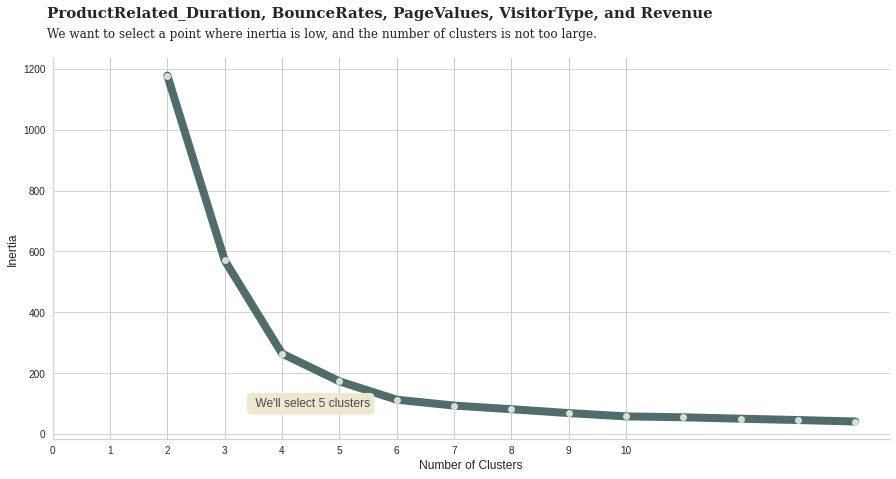

In [ ]:
# Selecting columns for clustering with k-means: ProductRelated_Duration, 'BounceRates', 'PageValues', and 'VisitorType'
selected_cols = ['ProductRelated_Duration','BounceRates','PageValues','VisitorType','Revenue']
cluster_data = df_lab.loc[:,['ProductRelated_Duration','BounceRates', 'PageValues','VisitorType','Revenue' ]]
#scaler = StandardScaler()
scaler = MinMaxScaler()
cluster_scaled = scaler.fit_transform(cluster_data)
fig, ax = plt.subplots(figsize=(15,7))
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(clusters_range,inertias, '-' , color='#244747',alpha = 0.8,linewidth=8)
plt.plot(clusters_range,inertias, 'o',linewidth=20,color='#d4dddd')    


##

plt.xlabel('Number of Clusters',fontsize=12) , plt.ylabel('Inertia',fontsize=12)
ax.xaxis.set_ticks(np.arange(0,11,1))

# Title & Subtitle
fig.text(0.12,0.96,'ProductRelated_Duration, BounceRates, PageValues, VisitorType, and Revenue', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.12,0.92,'We want to select a point where inertia is low, and the number of clusters is not too large.',fontfamily='serif',fontsize=12)
ax.annotate(" We'll select 5 clusters", 
            xy=(4.5, 100), fontsize=12,
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))



# Ax spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

# Grid
ax.set_axisbelow(True)# Ax spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.yaxis.grid(color='lightgray', linestyle='-')
plt.show()


In [ ]:
cluster_scaled[:10,0]

array([0.00000000e+00, 1.00041389e-03, 0.00000000e+00, 4.16839119e-05,
       9.80874553e-03, 2.41063273e-03, 0.00000000e+00, 0.00000000e+00,
       5.78364278e-04, 1.15360226e-02])

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

#Metrics used to determine optimum number of clusters: Silhouette Score
#Silhouette analysis  used to choose optimal value for clusters: 


1. Silhouette score falls within the range [-1, 1].
2. Silhouette score of 1 means that the clusters are very dense and nicely separated. 
3. The score of 0 means that clusters are overlapping. 
4. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
5. silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.


#Reference:* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html*

In [ ]:
# Running various cluster numbers with various random seeds

clusters_range = range(2,15)
random_range = range(0,10)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        print("For N_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

For N_clusters = 2  and seed = 0 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 1 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 2 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 3 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 4 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 5 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 6 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 7 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 8 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 2  and seed = 9 
The average silhouette_score is : 0.7290612235157913
For N_clusters = 3  and seed = 0 
The average silhouette_score is : 0.7637922610901912
For N_clusters = 3  and seed = 1 
The avera

In [ ]:
# Turn results in to a pivot table

result = pd.DataFrame(results, columns=["Number of clusters","Random seed","Silhouette_score"])
pivot_km = pd.pivot_table(result, index="Number of clusters", columns="Random seed",values="Silhouette_score")

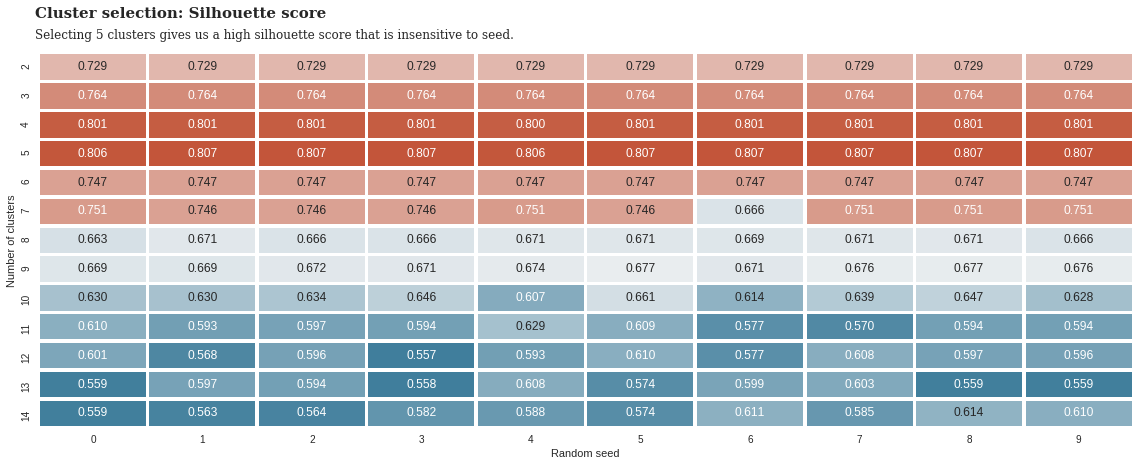

In [ ]:
# Turn that pivot in to a nice visual

fig = plt.figure(figsize=(16, 6))

# Title and sub-title

fig.text(0.035, 1.05, 'Cluster selection: Silhouette score', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.035, 1.001, 'Selecting 5 clusters gives us a high silhouette score that is insensitive to seed.', fontsize=12, fontweight='light', fontfamily='serif')

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(pivot_km, annot=True, linewidths=2.5, fmt='.3f', cmap=cmap,cbar=False)

plt.tight_layout()

In [ ]:
# Five looks to be a good number of clusters. We will also assign these clusters to a df
kmeans_sel = KMeans(n_clusters=5, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

For n_clusters = 5  and seed = 9 
The average silhouette_score is : 0.8073870474518475


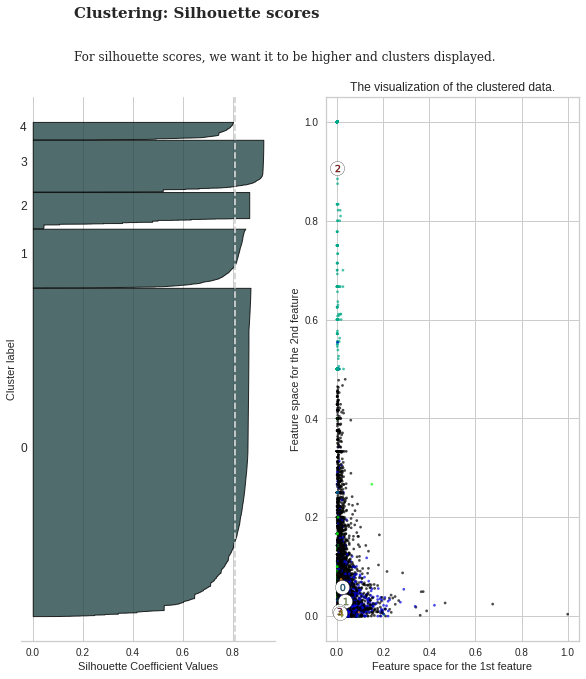

In [ ]:
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=5, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 5," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

y_lower = 10
for i in range(5):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 5)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor='#244747', edgecolor="black",linewidth=1, alpha=0.8)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
    
fig.text(0.198, .99, 'Clustering: Silhouette scores', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.198,.93, 'For silhouette scores, we want it to be higher and clusters displayed.', fontsize=12, fontweight='light', fontfamily='serif')
    

ax1.get_yaxis().set_ticks([])
#ax1.set_title("Silhouette plot for various clusters",loc='left')
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="lightgray", linestyle="--")
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
# 2nd Plot showing the actual clusters formed
n_clusters=5
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(cluster_scaled[:, 0], cluster_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")
plt.show()

In [ ]:
print(clustered_data.VisitorType[clustered_data['Revenue']==1].value_counts())
print(clustered_data.VisitorType[clustered_data['Revenue']==0].value_counts())

0    1470
1     422
2      16
Name: VisitorType, dtype: int64
0    9081
1    1272
2      69
Name: VisitorType, dtype: int64


In [ ]:
clustered_data

ProductRelated_Duration  BounceRates  ...  Revenue  Cluster
0                     0.000000     0.200000  ...        0        2
1                    64.000000     0.000000  ...        0        0
2                     0.000000     0.200000  ...        0        2
3                     2.666667     0.050000  ...        0        0
4                   627.500000     0.020000  ...        0        0
...                        ...          ...  ...      ...      ...
12325              1783.791667     0.007143  ...        0        0
12326               465.750000     0.000000  ...        0        0
12327               184.250000     0.083333  ...        0        0
12328               346.000000     0.000000  ...        0        0
12329                21.250000     0.000000  ...        0        3

[12330 rows x 6 columns]

In [ ]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

Cluster  ProductRelated_Duration  ...  VisitorType  Revenue
0       0                   1263.1  ...          0.0      0.0
1       1                   2170.6  ...          0.0      1.0
2       2                     38.3  ...          0.1      0.0
3       3                    568.6  ...          1.0      0.0
4       4                    888.3  ...          1.0      1.0

[5 rows x 6 columns]

In [ ]:
#Determine size of each cluster
print(f"Size of each cluster is=\n{clustered_data.Cluster.value_counts()}")

Size of each cluster is=
0    8217
1    1470
3    1297
2     908
4     438
Name: Cluster, dtype: int64


#Cluster sizes: largest cluster 0, smallest cluster 4


In [ ]:
#Merging the cluster data back to the original input dataframe
cluster_only = clustered_data[['Cluster']]
merge = pd.merge(df, cluster_only, left_index=True, right_index=True)
merge

Administrative  Administrative_Duration  ...  Revenue  Cluster
0                   0                      0.0  ...    False        2
1                   0                      0.0  ...    False        0
2                   0                      0.0  ...    False        2
3                   0                      0.0  ...    False        0
4                   0                      0.0  ...    False        0
...               ...                      ...  ...      ...      ...
12325               3                    145.0  ...    False        0
12326               0                      0.0  ...    False        0
12327               0                      0.0  ...    False        0
12328               4                     75.0  ...    False        0
12329               0                      0.0  ...    False        3

[12330 rows x 19 columns]

#Clusters being categorized into categories: Non-Purchasers, Targets (potential customers), and Purchasers based on the 'ProductRelated_Duration' i.e. Purchasers are the ones with largest 'ProductRelated_Duration' and vice-versa for 'Non-Purchasers'. Targets are the intermediate ones who do not end-up purchasing. 
# Categorizing them into 3 instead of 5; which is equivalent to having 3 clusters instead of 5. This seems to be better solution as seen from analysis below.

In [ ]:
merge['Cluster_Label'] = merge['Cluster'].apply(lambda x: 'Non-Purchasers' if x == 2 else 
                                               'Targets' if x == 0 else 'Targets' if x==3 else
                                               'Purchasers' if x==1 else 'Purchasers')


In [ ]:
print(merge['Cluster_Label'])

0        Non-Purchasers
1               Targets
2        Non-Purchasers
3               Targets
4               Targets
              ...      
12325           Targets
12326           Targets
12327           Targets
12328           Targets
12329           Targets
Name: Cluster_Label, Length: 12330, dtype: object


In [ ]:
merge['Cluster'] = merge['Cluster'].map(str)
# Order for plotting categorical vars
Cluster_ord = ['0','1','2','3','4']
clus_label_order = ['Targets','Purchasers','Non-Purchasers','Targets','Purchasers']
print(clus_label_order)
print(merge['Cluster'].value_counts())


['Targets', 'Purchasers', 'Non-Purchasers', 'Targets', 'Purchasers']
0    8217
1    1470
3    1297
2     908
4     438
Name: Cluster, dtype: int64


#Identifying from visitor types the customers clustered as: Purchasers, Targets, and Non-Purchasers.
#Computing ratios of visitor types in each cluster.

In [ ]:
clus_ord = merge['Cluster_Label'].value_counts().index

clu_data = merge['Cluster_Label'].value_counts()[clus_label_order]
##

data_cg = merge.groupby('Cluster_Label')['VisitorType'].value_counts().unstack().loc[clus_label_order]
data_cg['sum'] = data_cg.sum(axis=1)

##
data_cg_ratio_pre = (data_cg.T / data_cg['sum']).T[['Returning_Visitor','New_Visitor','Other']][::-1]
data_cg_ratio = data_cg_ratio_pre.drop_duplicates()
data_cg_ratio

VisitorType     Returning_Visitor  New_Visitor     Other
Cluster_Label                                           
Purchasers               0.770440     0.221174  0.008386
Targets                  0.863675     0.130755  0.005571
Non-Purchasers           0.951542     0.030837  0.017621

In [ ]:
print(data_cg_ratio['Returning_Visitor']['Purchasers'])

0.7704402515723271


# Visitor type distribution according to clusters: Purchasers, Non-Purchasers and Targets 

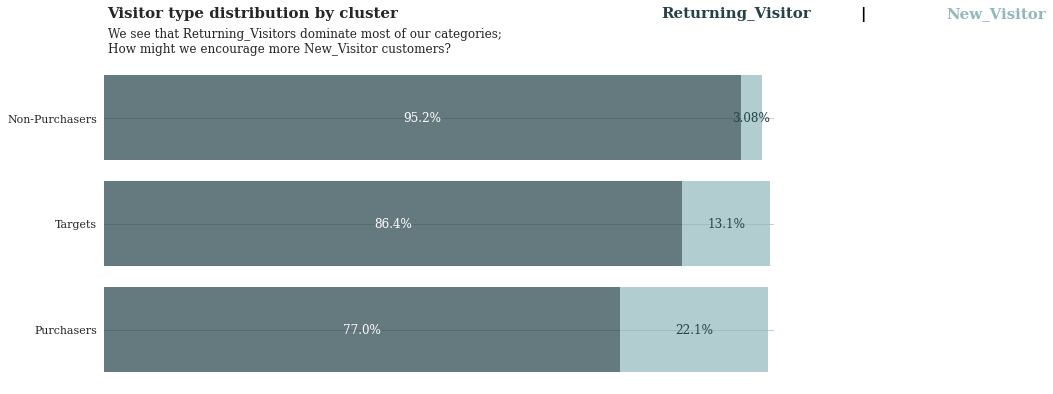

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(data_cg_ratio.index, data_cg_ratio['Returning_Visitor'], 
        color='#244247', alpha=0.7, label='Returning_Visitor')
ax.barh(data_cg_ratio.index, data_cg_ratio['New_Visitor'], left=data_cg_ratio['Returning_Visitor'], 
        color='#91b8bd', alpha=0.7, label='New_Visitor')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels((data_cg_ratio.index), fontfamily='serif', fontsize=11)


# Returning_Visitor percentage
for i in data_cg_ratio.index:
    ax.annotate(f"{data_cg_ratio['Returning_Visitor'][i]*100:.3}%", 
                   xy=(data_cg_ratio['Returning_Visitor'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_cg_ratio.index:
    ax.annotate(f"{data_cg_ratio['New_Visitor'][i]*100:.3}%", 
                   xy=(data_cg_ratio['Returning_Visitor'][i]+data_cg_ratio['New_Visitor'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='#244247')
    

fig.text(0.129, 0.98, 'Visitor type distribution by cluster', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.129, 0.9, 
         '''
We see that Returning_Visitors dominate most of our categories; 
How might we encourage more New_Visitor customers?''' , fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)

fig.text(0.77,0.98,"Returning_Visitor", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(1.0,0.98,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(1.1,0.98,"New_Visitor", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')
plt.show()


#Based on clustering and further analysis, we see that the returning visitors dominate as customers. How can we encourage new_visitors customers so that they become purchasers?

#Additional analysis: Results with 3 clusters:
Silhouette Scores, Ratios of visitor types in each cluster and their visualization
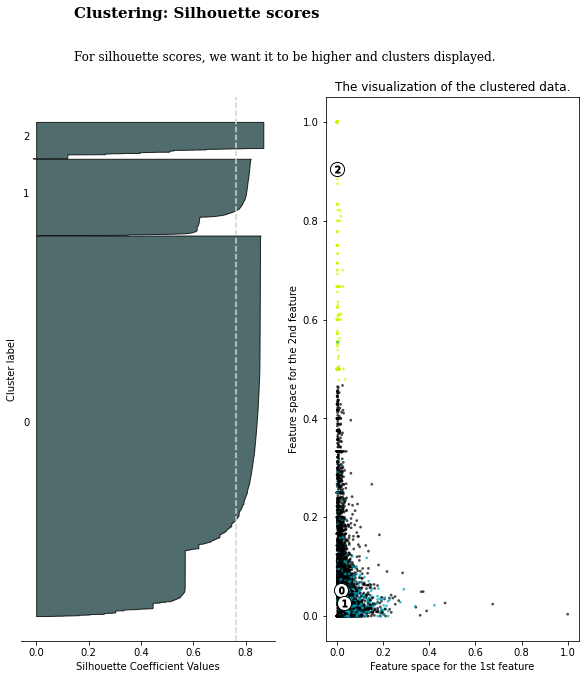

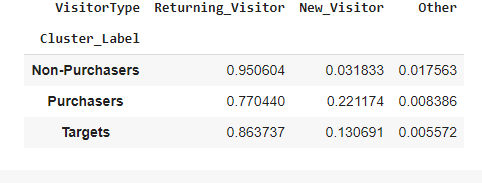

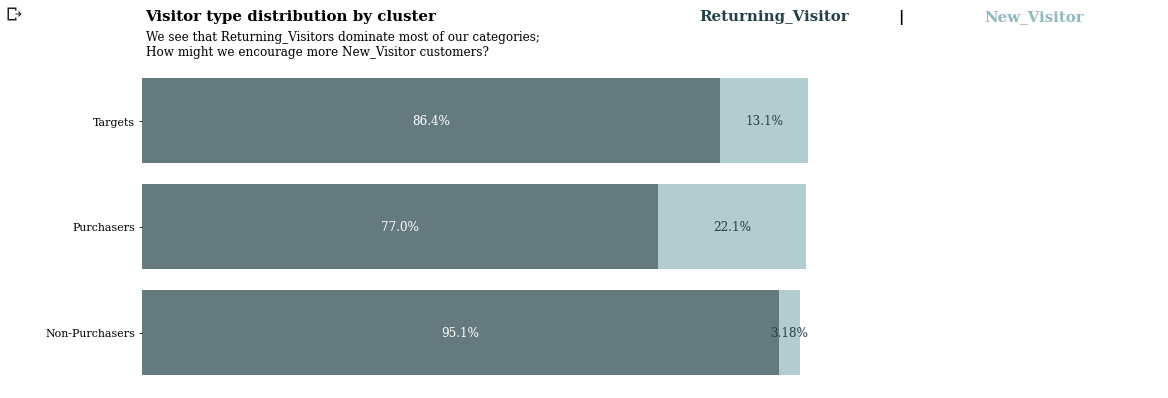